In [ ]:
import os
from google.colab import drive
drive.mount('drive/')

Mounted at drive/


In [ ]:
os.chdir('drive/My Drive/HETIC/NLP/SquidGame')

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
df = pd.read_csv('allocine_squidgame.csv')

# Explo

In [ ]:
df.head()

,Note,Description,Date,nombre_good,nombre_follow,key
0,"3,0","On s'attendait à une fin plus élaborée, claire...",Publiée le 2 octobre 2021,22\n\n\n10,Suivre son activité,0
1,"2,5",Encore une série très sur-côtée ! Tout est pré...,Publiée le 1 octobre 2021,24\n\n\n12,Suivre son activité,1
2,"4,5",Pas fan des séries coréennes en général. Je do...,Publiée le 22 septembre 2021,20\n\n\n21,Suivre son activité,2
3,"4,5","Disons le tout de suite, je suis fan depuis 30...",Publiée le 5 octobre 2021,9\n\n\n10,Suivre son activité,3
4,"4,0","Visuellement recherché, très ludique, rythmé e...",Publiée le 25 septembre 2021,7\n\n\n\n9,Suivre son activité,4


In [ ]:
df.shape

(341, 6)

Les données sont composées de 341 commentaires

In [ ]:
df.dtypes

Note             object
Description      object
Date             object
nombre_good      object
nombre_follow    object
key               int64
dtype: object

In [ ]:
df['nombre_follow'].value_counts()

Suivre son activité    341
Name: nombre_follow, dtype: int64

In [ ]:
df['Note'].value_counts()

5,0    72
4,0    61
4,5    46
3,5    46
0,5    26
3,0    24
2,0    22
2,5    19
1,0    15
1,5    10
Name: Note, dtype: int64

La répartition des notes est inégale, cela pourrait poser problème si on effectue une prédiction sur la note

In [ ]:
df['word_count'] = df["Description"].apply(lambda x: len(str(x).split(" ")))

df['char_count'] = df["Description"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))

df['sentence_count'] = df["Description"].apply(lambda x: len(str(x).split(". ")))

df['avg_word_length'] = df['char_count'] / df['word_count']

df['avg_sentence_lenght'] = df['word_count'] / df['sentence_count']

# Cleaning

In [ ]:
df.drop('nombre_follow', axis=1, inplace=True)
df.drop('key', axis=1, inplace=True)

On supprime les colonnes nombre_follow et key car elles sont inutiles. La colonne nombre_follow contient une valeur unique et la colonne key représente l'id du commentaire

In [ ]:
df['good'] = df.nombre_good.apply(lambda x: re.split("\s+", x)[0])

df['bad'] = df.nombre_good.apply(lambda x: re.split("\s+", x)[1])

df.drop('nombre_good', axis=1, inplace=True)

In [ ]:
df['Note'] = df['Note'].apply(lambda x: x.replace(',', '.'))
df['Note'] = df['Note'].astype(float)

In [ ]:
pip install dateparser

     |████████████████████████████████| 288 kB 4.8 MB/s 


In [ ]:
import dateparser

In [ ]:
df['Date'] = df['Date'].apply(lambda x: re.sub('Publiée le ', '', x))
df['Date'] = df.apply(lambda row: dateparser.parse(row['Date']), axis = 1)

In [ ]:
df.head()

,Note,Description,Date,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,good,bad
0,3.0,"On s'attendait à une fin plus élaborée, claire...",2021-10-02,559,2696,14,4.822898,39.928571,22,10
1,2.5,Encore une série très sur-côtée ! Tout est pré...,2021-10-01,89,409,3,4.595506,29.666667,24,12
2,4.5,Pas fan des séries coréennes en général. Je do...,2021-09-22,30,156,4,5.200000,7.500000,20,21
3,4.5,"Disons le tout de suite, je suis fan depuis 30...",2021-10-05,136,667,6,4.904412,22.666667,9,10
4,4.0,"Visuellement recherché, très ludique, rythmé e...",2021-09-25,30,170,2,5.666667,15.000000,7,9


# Tokenization

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df['description_clean'] = df['Description'].copy()
df['description_clean'] = df['description_clean'].map(lambda x : re.sub('[,\.!?()"]', '', x))
df['description_clean'] = df['description_clean'].map(lambda x : re.sub('\d', '', x))

In [ ]:
df['token'] = df.apply(lambda row : word_tokenize(str(row['description_clean'])), axis=1)

In [ ]:
french_stopwords = set(stopwords.words('french'))
french_stopwords = [word for word in french_stopwords if word not in ["ne", "n", "pas"]]

Effectuant une analyse des sentiments, on supprime la négation de la liste des stopwords pour éviter de perdre de l'information

In [ ]:
df['token'] = df['token'].apply(lambda x : [word for word in x if word not in french_stopwords])

In [ ]:
df.head()

,Note,Description,Date,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,good,bad,description_clean,token
0,3.0,"On s'attendait à une fin plus élaborée, claire...",2021-10-02,559,2696,14,4.822898,39.928571,22,10,On s'attendait à une fin plus élaborée clairem...,"[On, s'attendait, fin, plus, élaborée, clairem..."
1,2.5,Encore une série très sur-côtée ! Tout est pré...,2021-10-01,89,409,3,4.595506,29.666667,24,12,Encore une série très sur-côtée Tout est prév...,"[Encore, série, très, sur-côtée, Tout, prévisi..."
2,4.5,Pas fan des séries coréennes en général. Je do...,2021-09-22,30,156,4,5.200000,7.500000,20,21,Pas fan des séries coréennes en général Je doi...,"[Pas, fan, séries, coréennes, général, Je, doi..."
3,4.5,"Disons le tout de suite, je suis fan depuis 30...",2021-10-05,136,667,6,4.904412,22.666667,9,10,Disons le tout de suite je suis fan depuis an...,"[Disons, tout, suite, fan, depuis, ans, produc..."
4,4.0,"Visuellement recherché, très ludique, rythmé e...",2021-09-25,30,170,2,5.666667,15.000000,7,9,Visuellement recherché très ludique rythmé et ...,"[Visuellement, recherché, très, ludique, rythm..."


# Créer les variables cibles

In [ ]:
df["Sentiment"] = df['Note'].apply(lambda x: 0 if x<4 else 1)

In [ ]:
def remplir_inter_note(note):
  if note < 3:
    return "0-2"
  elif note <= 4:
    return "3-4"
  else:
    return "5"

In [ ]:
df['Inter_Note'] = df['Note'].apply(lambda x: remplir_inter_note(x))

La répartition des notes étant inégale on crée une variable représentant un intervalle de note à laquelle on attribue chaque commentaire afin d'avoir une répartition plus équilibré

# Stemming

In [ ]:
from nltk.stem import SnowballStemmer

In [ ]:
stemmer = SnowballStemmer('french')
df['stemming'] = df.token.copy().apply(lambda x: [stemmer.stem(item) for item in x])

In [ ]:
df.head()

,Note,Description,Date,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,good,bad,description_clean,token,Sentiment,Inter_Note,stemming
0,3.0,"On s'attendait à une fin plus élaborée, claire...",2021-10-02,559,2696,14,4.822898,39.928571,22,10,On s'attendait à une fin plus élaborée clairem...,"[On, s'attendait, fin, plus, élaborée, clairem...",0,3-4,"[on, s'attend, fin, plus, élabor, clair, de, d..."
1,2.5,Encore une série très sur-côtée ! Tout est pré...,2021-10-01,89,409,3,4.595506,29.666667,24,12,Encore une série très sur-côtée Tout est prév...,"[Encore, série, très, sur-côtée, Tout, prévisi...",0,0-2,"[encor, ser, tres, sur-côt, tout, prévisibl, p..."
2,4.5,Pas fan des séries coréennes en général. Je do...,2021-09-22,30,156,4,5.200000,7.500000,20,21,Pas fan des séries coréennes en général Je doi...,"[Pas, fan, séries, coréennes, général, Je, doi...",1,5,"[pas, fan, ser, coréen, général, je, dois, avo..."
3,4.5,"Disons le tout de suite, je suis fan depuis 30...",2021-10-05,136,667,6,4.904412,22.666667,9,10,Disons le tout de suite je suis fan depuis an...,"[Disons, tout, suite, fan, depuis, ans, produc...",1,5,"[dison, tout, suit, fan, depuis, an, product, ..."
4,4.0,"Visuellement recherché, très ludique, rythmé e...",2021-09-25,30,170,2,5.666667,15.000000,7,9,Visuellement recherché très ludique rythmé et ...,"[Visuellement, recherché, très, ludique, rythm...",1,3-4,"[visuel, recherch, tres, ludiqu, rythm, galer,..."


# Approche de règles

### Train / Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df['stemming'], df['Sentiment'], test_size=0.3, random_state=27)

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform([" ".join(words) for words in X_train])
labels_X_tfidf = tfidf_vectorizer.get_feature_names_out()

X_test_tfidf = tfidf_vectorizer.transform([" ".join(words) for words in X_test])

In [ ]:
df_tdidf_train = pd.DataFrame(data=X_train_tfidf.toarray(), columns=labels_X_tfidf)

In [ ]:
df_y_train = y_train.to_frame().reset_index()

In [ ]:
df_y_train = df_y_train.drop('index', axis=1)

In [ ]:
df_tdidf_train['sentiment'] = df_y_train

### Model

In [ ]:
df_best_word = df_tdidf_train.groupby(['sentiment']).sum()

In [ ]:
df_best_word_transposed = df_best_word.T

In [ ]:
word_neg = df_best_word_transposed.iloc[:,0].sort_values(ascending=False).head(40)

In [ ]:
word_pos = df_best_word_transposed.iloc[:,1].sort_values(ascending=False).head(40)

In [ ]:
word_tri = [word for word in word_neg.index if word not in word_pos.index]

In [ ]:
y_test_predict = X_test.apply(lambda x: 0 if any(e in x for e in word_tri) else 1)

### Matrice de confusion

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

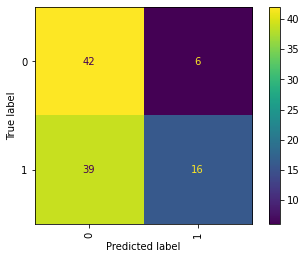

In [ ]:
cm = confusion_matrix(y_test, y_test_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(xticks_rotation='vertical')

plt.show()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

### CountVectorizer

In [ ]:
corpus = [" ".join(words) for words in df['stemming']]
vectorizer = CountVectorizer()
X_countVectorizer = vectorizer.fit_transform(corpus)
labels_X_countVectorizer = vectorizer.get_feature_names_out()

In [ ]:
df_X = pd.DataFrame(columns= labels_X_countVectorizer, data= X_countVectorizer.toarray())
df_X.head(10)

,abandon,abattr,abdul,abim,abois,abord,abordel,abordeun,about,abri,...,évolu,évoqu,êre,êtr,être,îl,île,œil,œuvr,œuvresc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,2,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split train/test

In [ ]:
X_bayes_train, X_bayes_test, y_bayes_train, y_bayes_test = train_test_split(df_X, df[['Sentiment', 'Inter_Note']], test_size=0.3, random_state=27)

## Analyse Sentiments

### Model

In [ ]:
clf = MultinomialNB()
clf_fit = clf.fit(X_bayes_train, y_bayes_train['Sentiment'])

In [ ]:
clf_fit.score(X_bayes_train, y_bayes_train['Sentiment'])

0.9957983193277311

In [ ]:
clf_fit.score(X_bayes_test, y_bayes_test['Sentiment'])

0.7475728155339806

In [ ]:
y_bayes_predict = clf_fit.predict(X_bayes_test)

### matrice de confusion

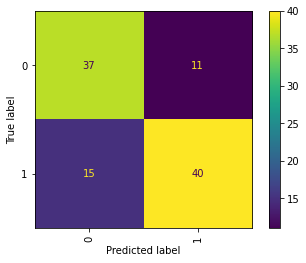

In [ ]:
cm = confusion_matrix(y_bayes_test['Sentiment'], y_bayes_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(xticks_rotation='vertical')

plt.show()

## Prédictions Notes

### Model

In [ ]:
clf_notes = MultinomialNB()
clf_fit_note = clf_notes.fit(X_bayes_train, y_bayes_train['Inter_Note'])

In [ ]:
clf_fit_note.score(X_bayes_train, y_bayes_train['Inter_Note'])

0.9831932773109243

In [ ]:
clf_fit_note.score(X_bayes_test, y_bayes_test['Inter_Note'])

0.5436893203883495

In [ ]:
y_bayes_predict_note = clf_fit_note.predict(X_bayes_test)

### matrice de confusion

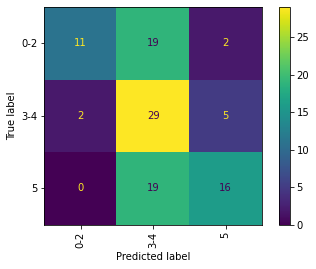

In [ ]:
cm = confusion_matrix(y_bayes_test['Inter_Note'], y_bayes_predict_note)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_fit_note.classes_)

disp.plot(xticks_rotation='vertical')

plt.show()

# Conclusion

Ayant des variables discrètes en entrée (compte de mots), on a utilisé le model MultinomialNB.
- Pour l'analyse de sentiments le modèle a une précision moyenne de 75% sur le test set contre 99% sur le training set.
- Concernant la prédiction des notes, le modèle a une précision moyenne de 54% sur le test set contre 98% sur le training set.

Malgré le fait que la précision du modèle est meilleure sur l'analyse de sentiments, elle reste encore améliorable. On pourrait utiliser une liste de stopwords personnalisée, ou simplement avoir plus de données.

Pour la prédictions des notes, malgré l'utilisation d'intervalle pour équilibrer la répartion des commentaires la précision du modèle reste faible. On remarque sur la matrice de confusion que l'intervalle 3-4 est celui qui pose problème. Cela peut être du au manque de données mais aussi au modèle utilisé.